In [197]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.special import boxcox1p

import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings


import keras 
import tensorflow as tf

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,6)

warnings.filterwarnings('ignore')

In [198]:
#Setting up the datasets
data_test = pd.read_csv('test.csv')

data_train = pd.read_csv('train.csv')

In [199]:
data_test.info(), data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

(None, None)

In [200]:
total = data_train.isnull().sum().sort_values(ascending=False)

In [201]:
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)

In [202]:
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


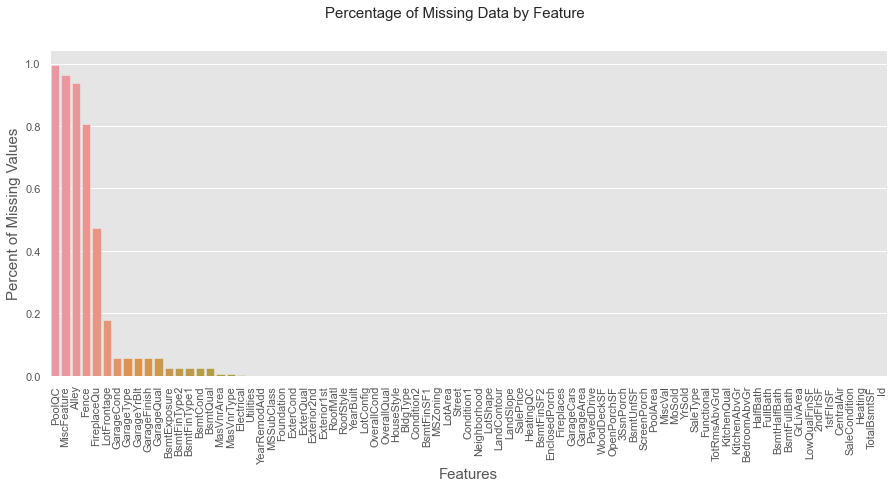

In [203]:
fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.suptitle('Percentage of Missing Data by Feature',fontsize=15)
missing_data.head()

In [204]:
data_test.duplicated().value_counts()

False    1459
dtype: int64

In [205]:
data_train.duplicated().value_counts()

False    1460
dtype: int64

In [206]:
join_data = pd.concat([data_train,data_test]).reset_index(drop=True)

In [207]:
join_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [208]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,6)

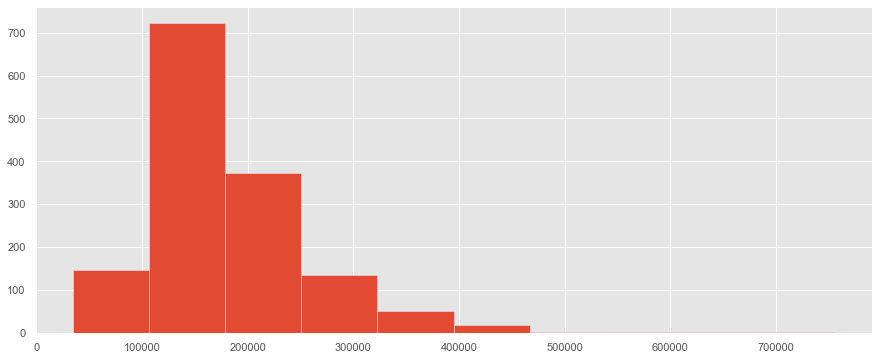

In [209]:
plt.hist(join_data['SalePrice'])
plt.show()

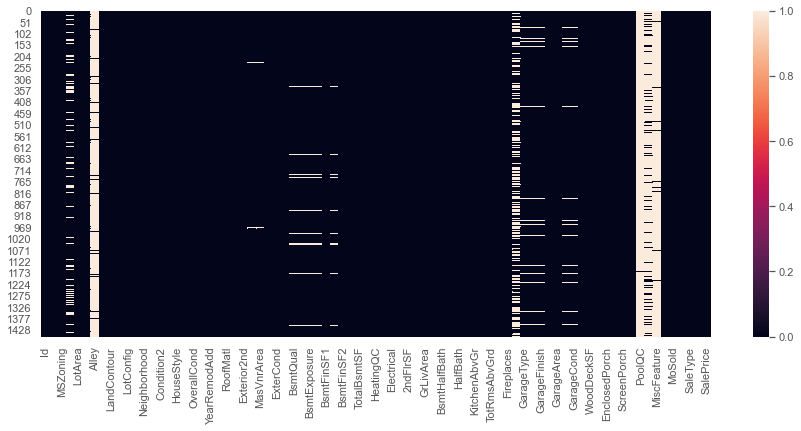

In [210]:
#Trying to understand the patterns of missing data in the training set
sns.heatmap(data_train.isnull(), cbar=True)

In [211]:
#Finding missing data in the dataset train
missing_data = data_train.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name','missing_count']
missing_data['Ratio'] = missing_data['missing_count'] / data_train.shape[0]
missing_data = missing_data.sort_values('missing_count', ascending=False)
missing_data.loc[missing_data['missing_count']>0]

,column_name,missing_count,Ratio
72,PoolQC,1453,0.995205
74,MiscFeature,1406,0.963014
6,Alley,1369,0.937671
73,Fence,1179,0.807534
57,FireplaceQu,690,0.472603
3,LotFrontage,259,0.177397
59,GarageYrBlt,81,0.055479
64,GarageCond,81,0.055479
58,GarageType,81,0.055479
60,GarageFinish,81,0.055479


In [212]:
#Selecting rows whose column is NaN
data_train[data_train['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


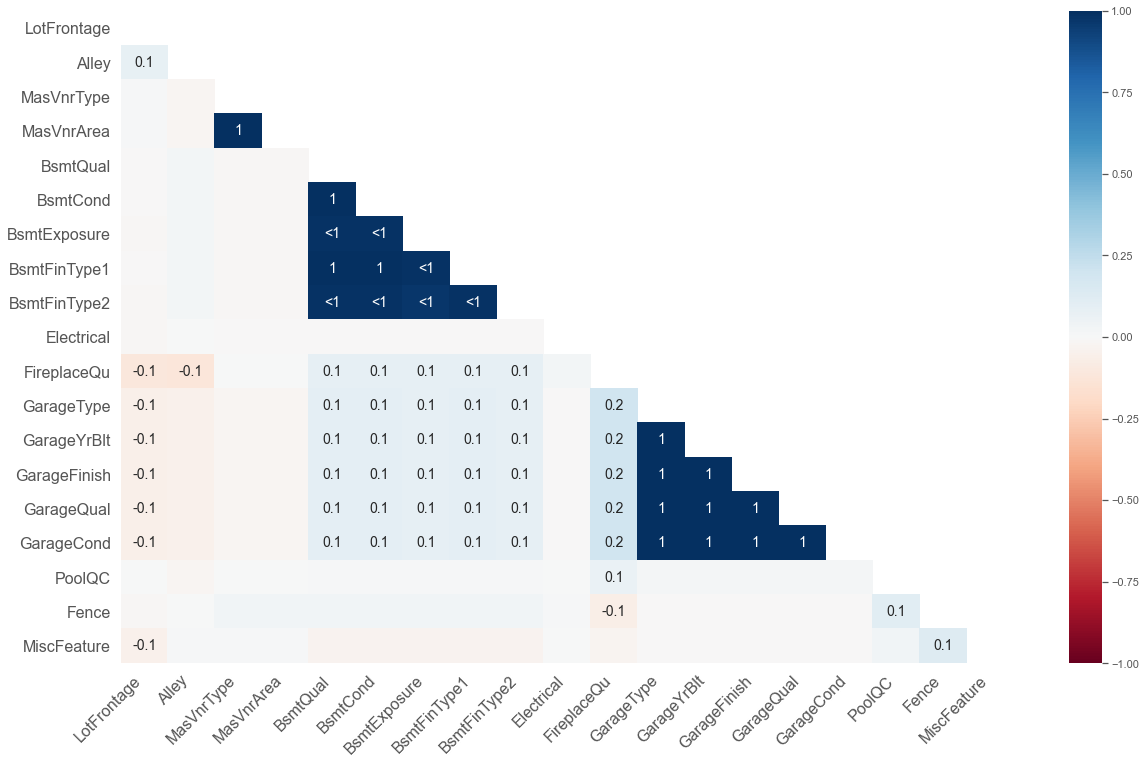

In [213]:
#Heatmap: measures nullity correlation. 
#In other words, how strongly the presence/absence of one variable affects another variable
msno.heatmap(data_train)
plt.show()

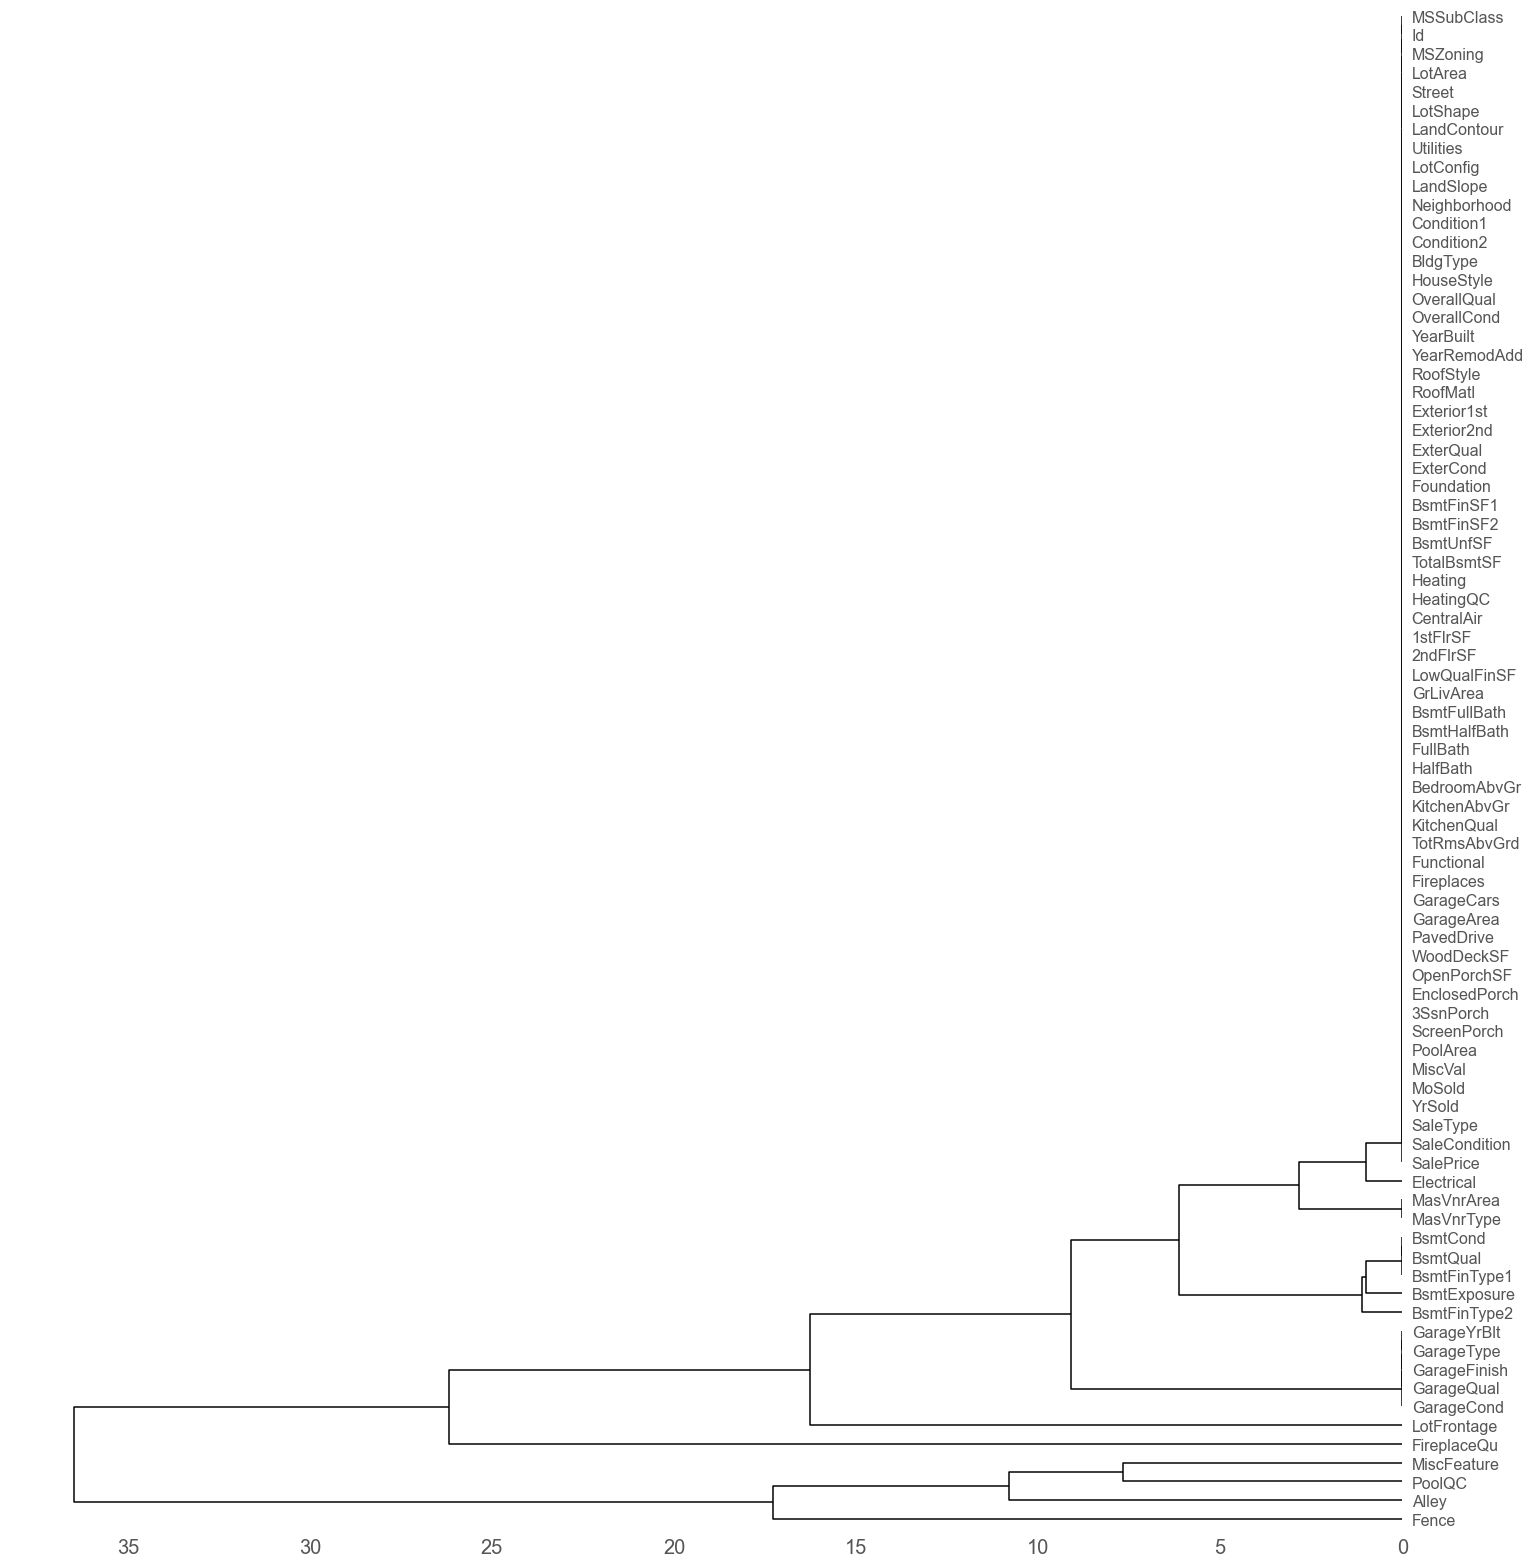

In [214]:
#Dendogram
msno.dendrogram(data_train)
plt.show()

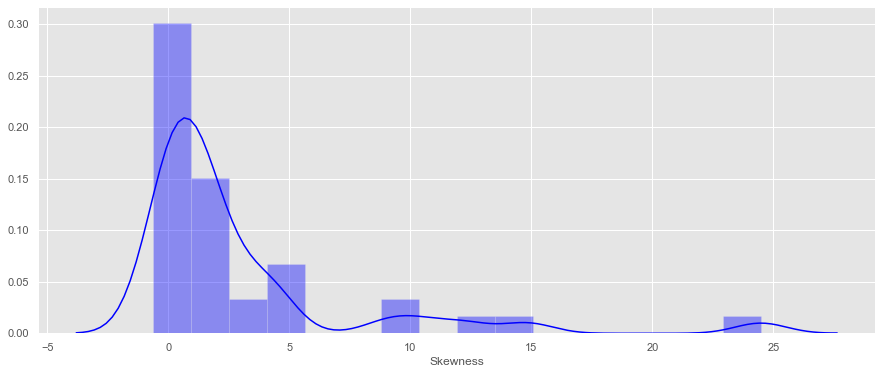

In [215]:
sns.distplot(data_train.skew(), color='blue', axlabel='Skewness')
plt.show()

In [216]:
skewness = data_train.skew().sort_values(ascending=False)
skewness

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [217]:
skew_feat = data_train[skewness[abs(skewness)>0.5].index]
skew_feat.columns

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
       'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass',
       '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'OverallCond',
       'TotRmsAbvGrd', 'HalfBath', 'Fireplaces', 'BsmtFullBath',
       'YearRemodAdd', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')

In [218]:
kurtosis = data_train.kurt().sort_values(ascending=False)
kurtosis

MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
KitchenAbvGr      21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
LotFrontage       17.452867
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.082417
OpenPorchSF        8.490336
SalePrice          6.536282
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
MoSold            -0.404109
GarageYrBlt       -0.418341
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1

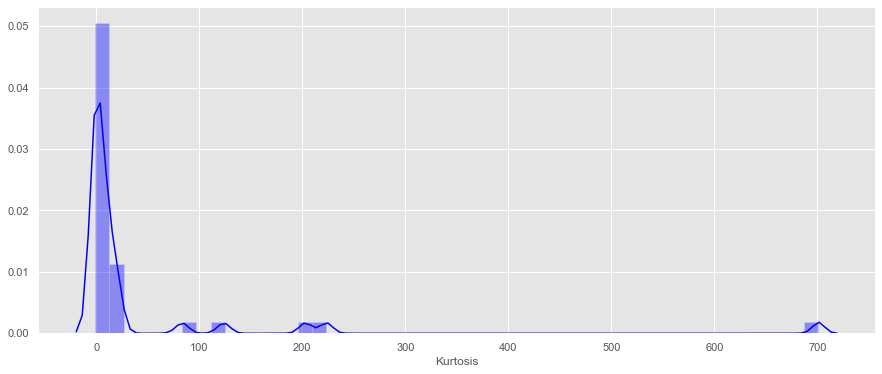

In [219]:
sns.distplot(data_train.kurt(), color='blue', axlabel='Kurtosis')
plt.show()

In [220]:
#Understanding Price
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

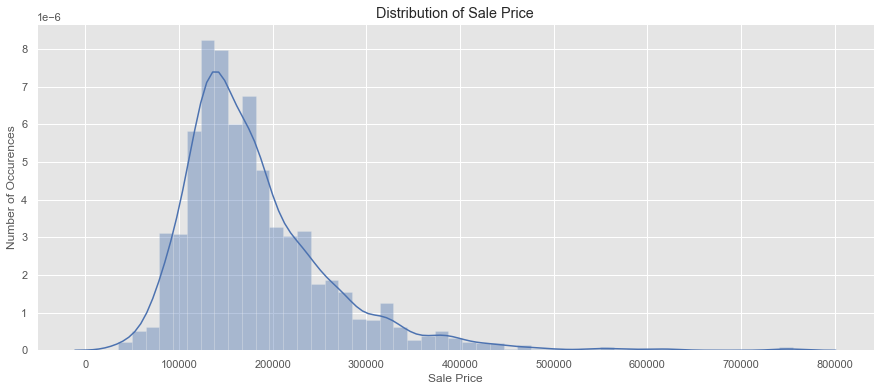

In [221]:
sns.distplot(data_train['SalePrice'],color='b',kde=True)
plt.title('Distribution of Sale Price')
plt.ylabel('Number of Occurences')
plt.xlabel('Sale Price')
plt.show()

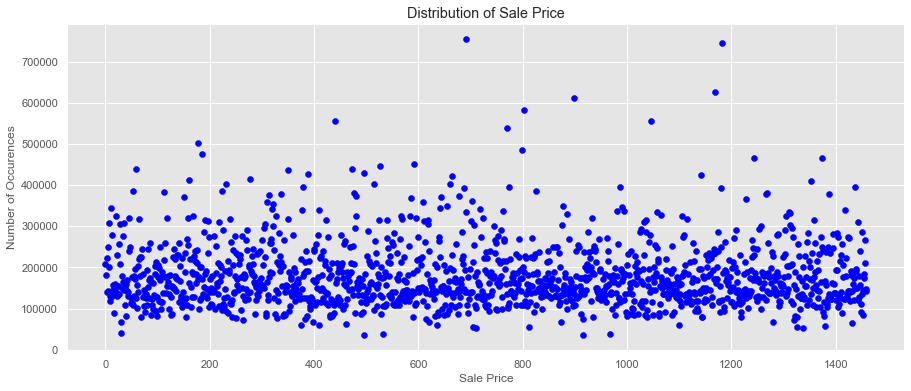

In [222]:
plt.scatter(range(data_train.shape[0]),data_train['SalePrice'].values,color='blue')
plt.title('Distribution of Sale Price')
plt.ylabel('Number of Occurences')
plt.xlabel('Sale Price')
plt.show()

In [223]:
data_train['SalePrice'].skew()

1.8828757597682129

In [224]:
data_train['SalePrice'].kurt()

6.536281860064529

In [225]:
(mu, sigma) = st.norm.fit(data_train['SalePrice'])

In [226]:
mu, sigma

(180921.19589041095, 79415.29188606751)

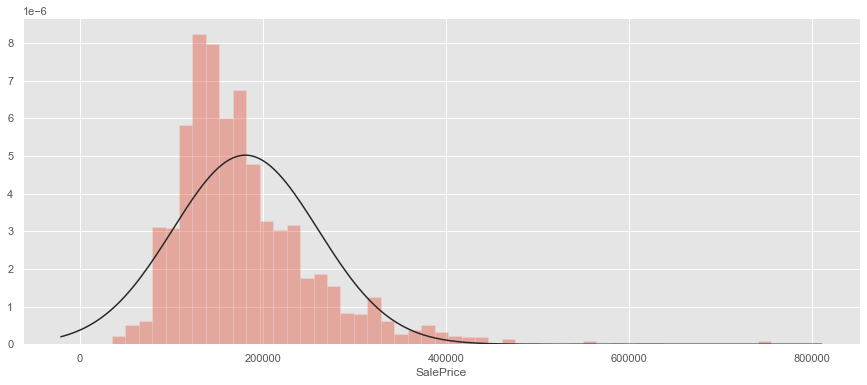

In [227]:
sns.distplot(data_train['SalePrice'], kde=False, fit=st.norm)
plt.show()

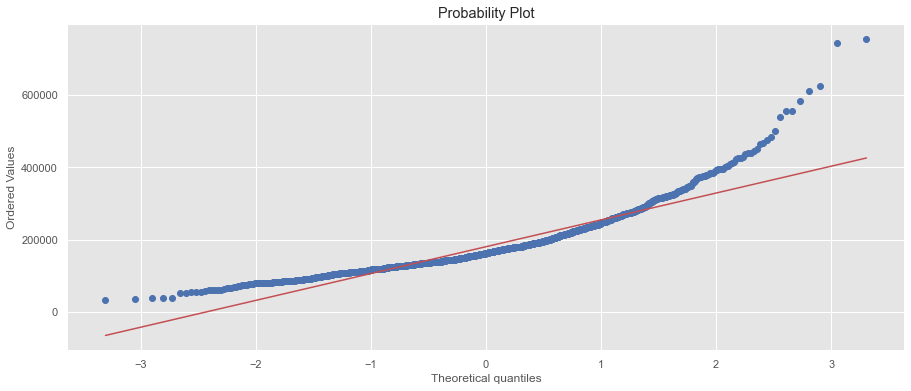

In [228]:
st.probplot(data_train['SalePrice'], plot=plt)
plt.show()

In [229]:
#Trying to normalize the data

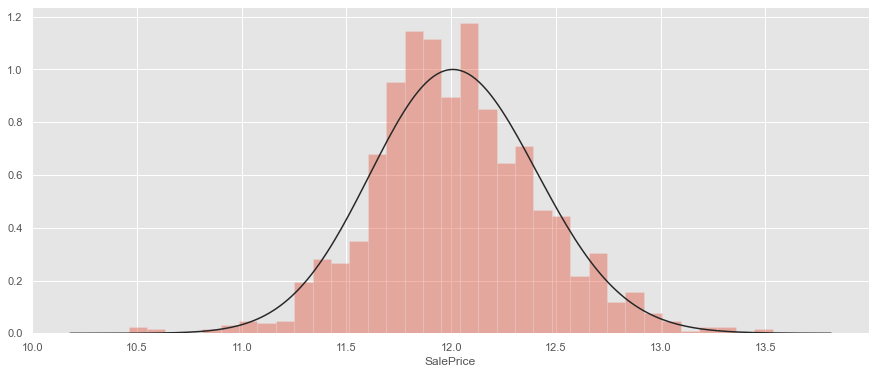

In [230]:
#Take 0s into consideration due to the np.log1p
sns.distplot(np.log1p(data_train['SalePrice']), kde=False,fit=st.lognorm)
plt.show()

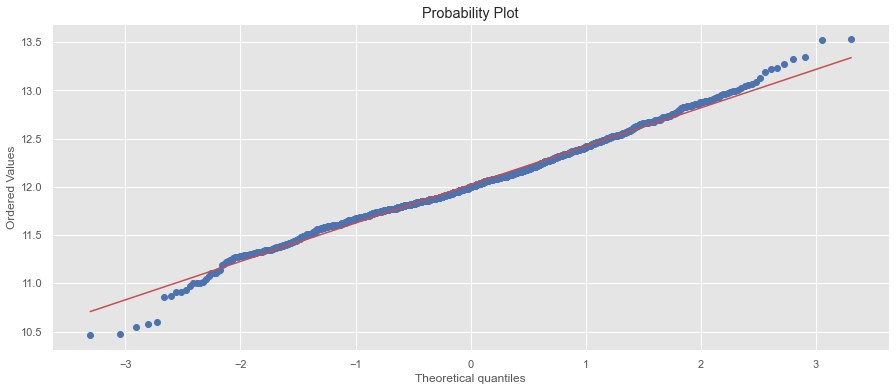

In [231]:
st.probplot(np.log1p(data_train['SalePrice']), plot=plt)
plt.show()

In [232]:
#Checking for Multicollinearity

In [233]:
correlations = data_train.corr()
attributes = correlations.iloc[:-1,:-1]
threshold = 0.5

In [234]:
high_corr= attributes[abs(attributes)>threshold][attributes != 1.0].unstack().dropna().to_dict()

In [235]:
unique_high_corr = pd.DataFrame(list(set([(tuple(sorted(key)),high_corr[key]) for key in high_corr])), columns=['Attribute Pair', 'Correlation'])

In [236]:
unique_high_corr = unique_high_corr.iloc[abs(unique_high_corr['Correlation']).argsort()[::-1]]

In [237]:
unique_high_corr

,Attribute Pair,Correlation
13,"(GarageArea, GarageCars)",0.882475
7,"(GarageYrBlt, YearBuilt)",0.825667
17,"(GrLivArea, TotRmsAbvGrd)",0.825489
26,"(1stFlrSF, TotalBsmtSF)",0.819530
19,"(2ndFlrSF, GrLivArea)",0.687501
14,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
25,"(BsmtFinSF1, BsmtFullBath)",0.649212
2,"(GarageYrBlt, YearRemodAdd)",0.642277
10,"(FullBath, GrLivArea)",0.630012
9,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


In [238]:
#Slice the data into numeric and categorical
n_feat = data_train.select_dtypes(include=[np.number])
cat_feat = data_train.select_dtypes(include=[np.object])

In [239]:
#Understanding correlation between Price and other variables
price_corr = n_feat.corr()
price_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

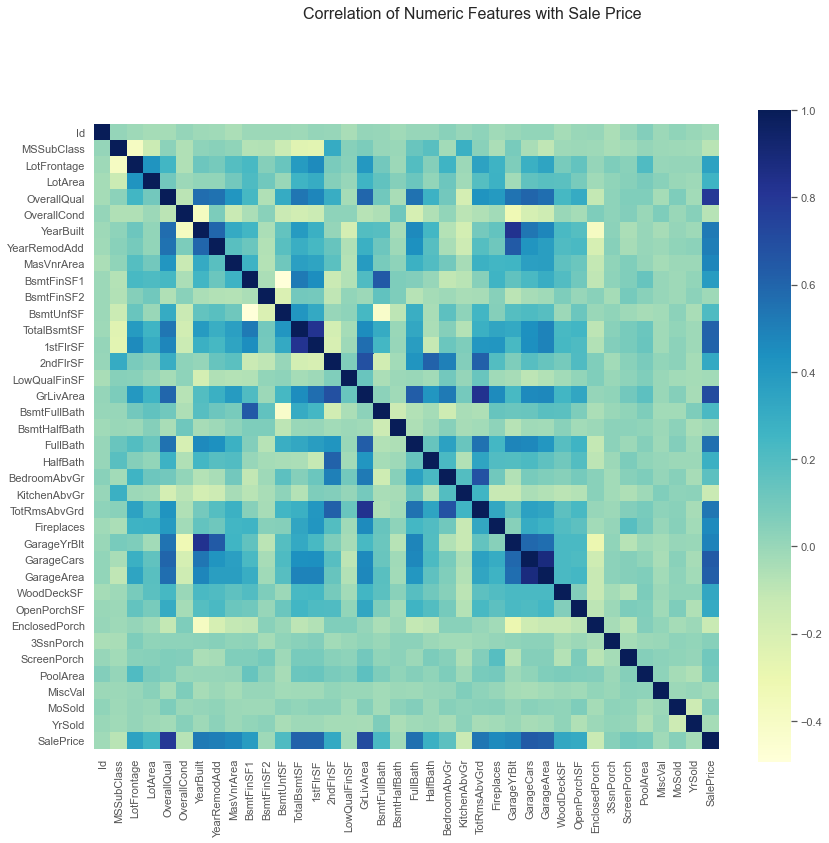

In [240]:
fig, ax = plt.subplots(figsize=(14,12))
plt.suptitle('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(price_corr, square=True, vmax=1, cmap="YlGnBu")
plt.show()

In [241]:
#Choosing top features

In [242]:
k = 11
best_corr_feat = price_corr.nlargest(k,'SalePrice')['SalePrice'].index

In [243]:
cm = np.corrcoef(data_train[best_corr_feat].values.T)

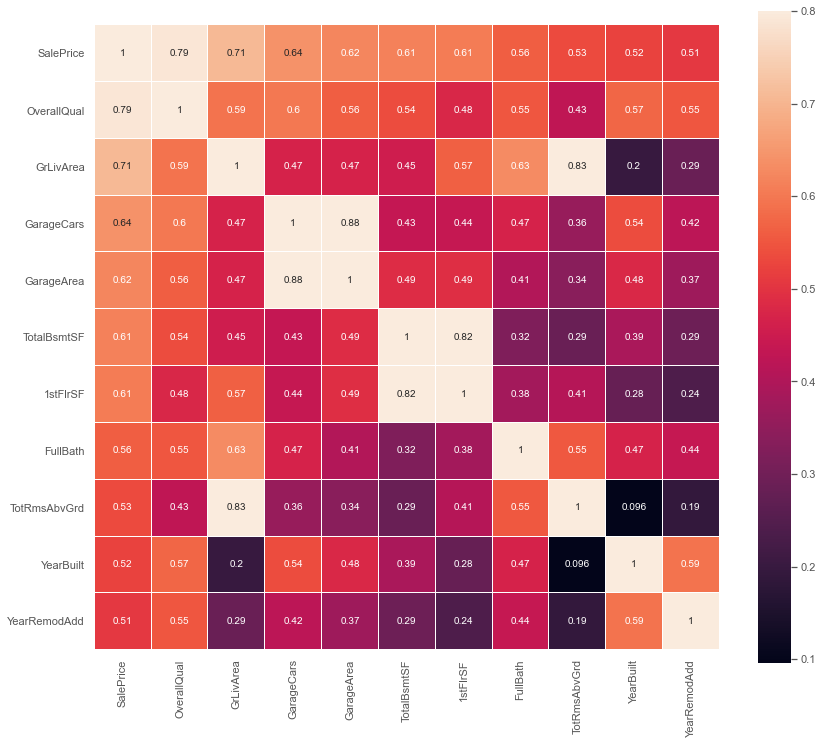

In [244]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8, linewidths=0.01, square=True, annot=True, linecolor='white', xticklabels=best_corr_feat.values,
           annot_kws={'size':10}, yticklabels=best_corr_feat.values)
plt.show()

In [245]:
corr_Matrix = data_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']].corr()

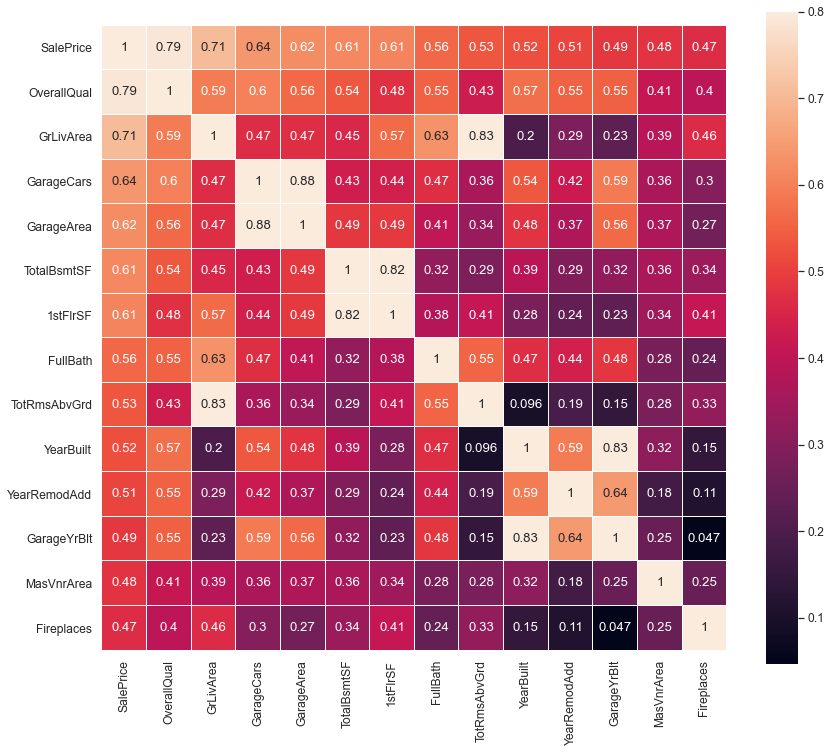

In [246]:
sns.set(font_scale=1.10)
plt.figure(figsize=(14,12))
sns.heatmap(corr_Matrix, vmax=.8,linewidths=0.01, square=True, annot=True,linecolor='white')
plt.show()

In [247]:
sns.set()
data_train_copy = data_train.copy()

In [248]:
data_train_copy['SalePrice'] = np.log1p(data_train_copy['SalePrice'])

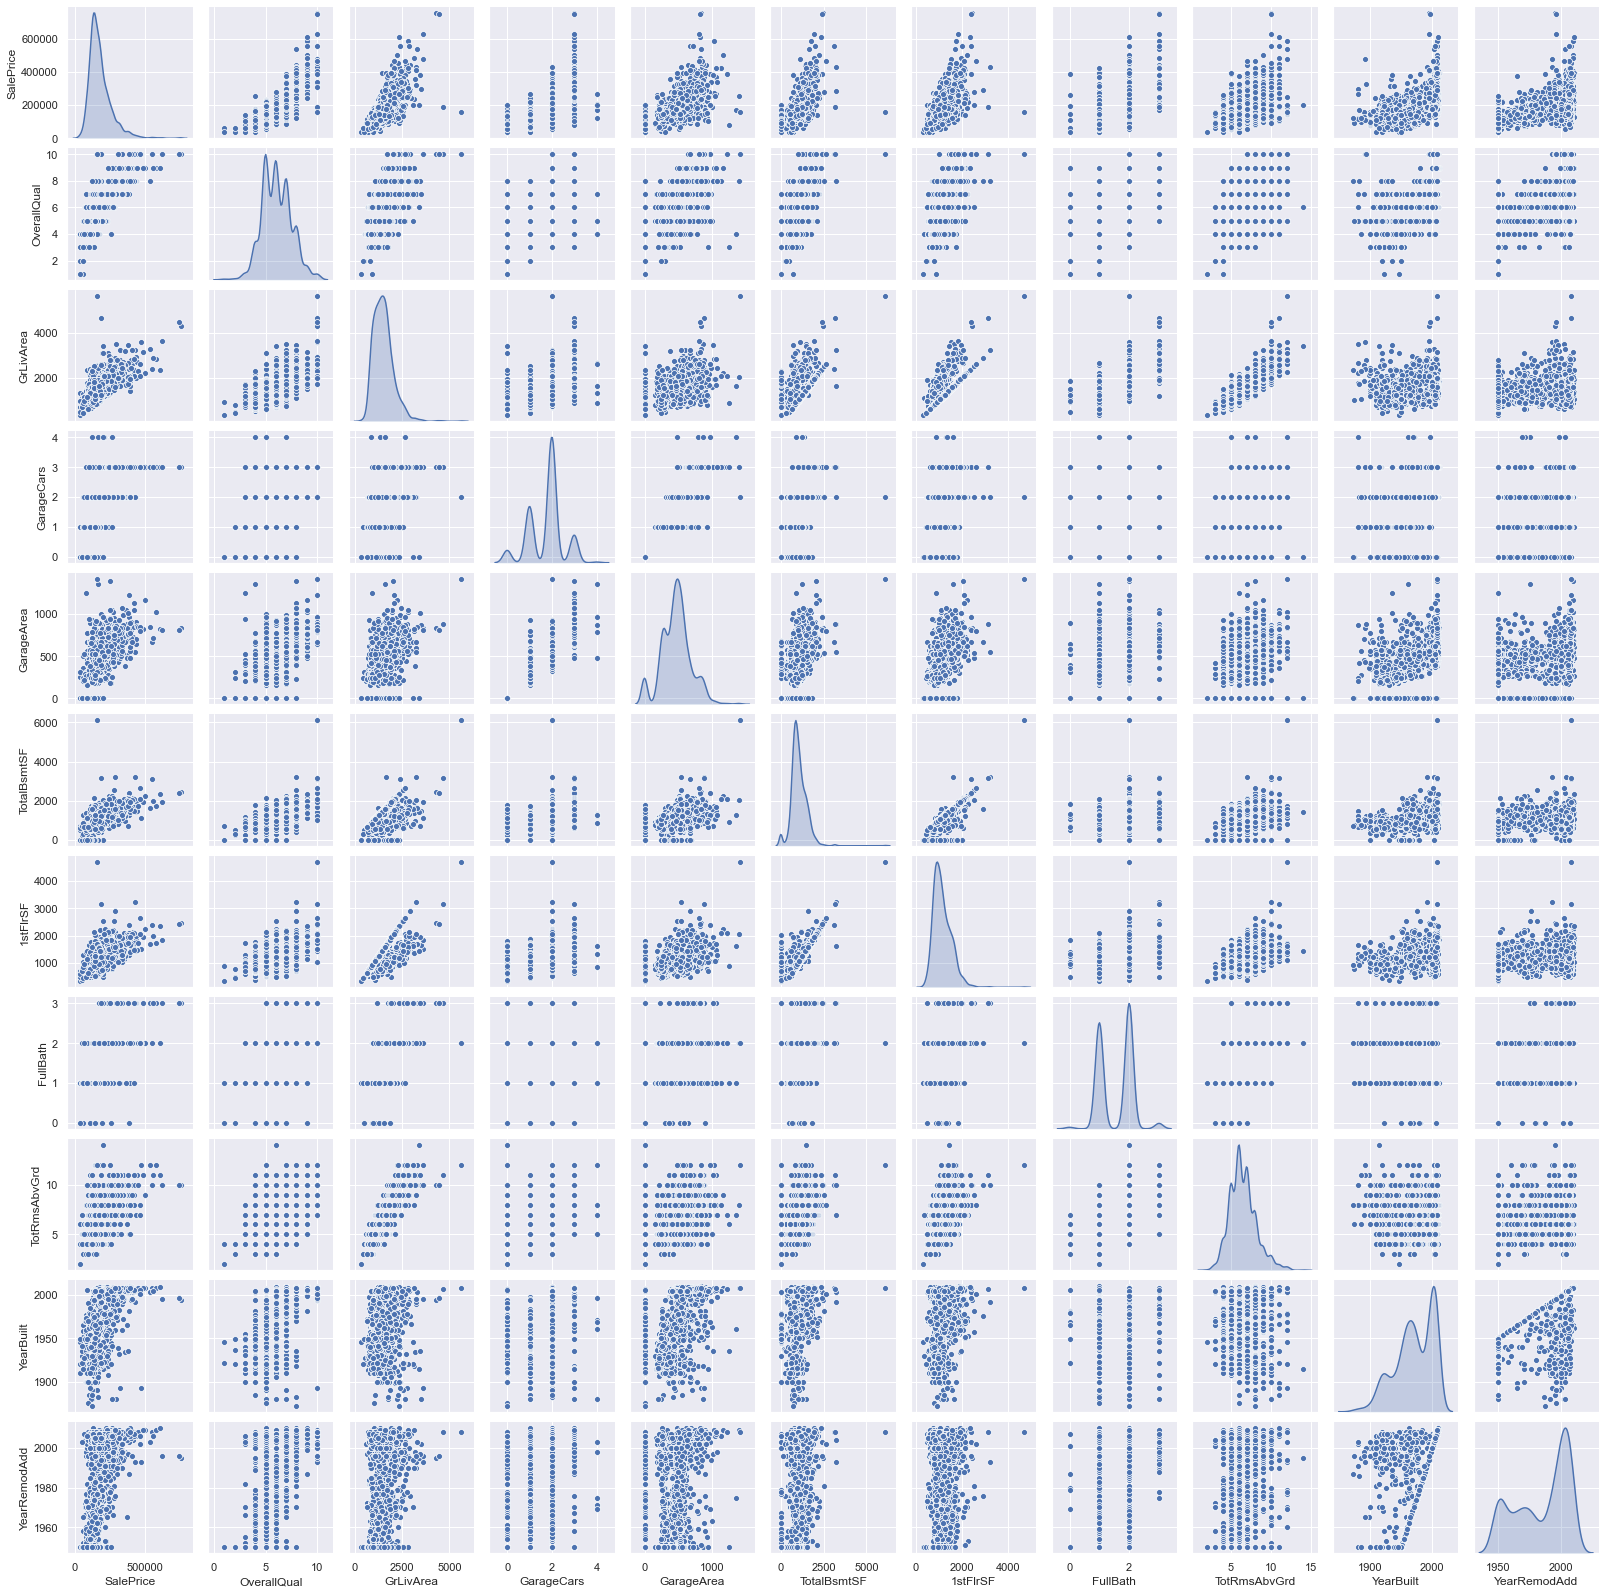

In [249]:
sns.pairplot(data_train[best_corr_feat],size = 2, kind='scatter', diag_kind='kde')
plt.show()

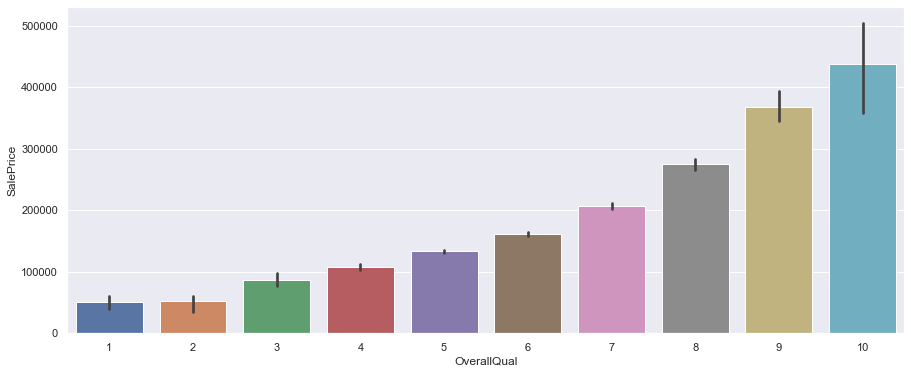

In [250]:
sns.barplot(data_train.OverallQual, data_train.SalePrice)
plt.show()

In [251]:
data = pd.concat([data_train['SalePrice'],data_train['OverallQual']], axis=1)
data

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


(-0.5, 9.5, 0.0, 800000.0)

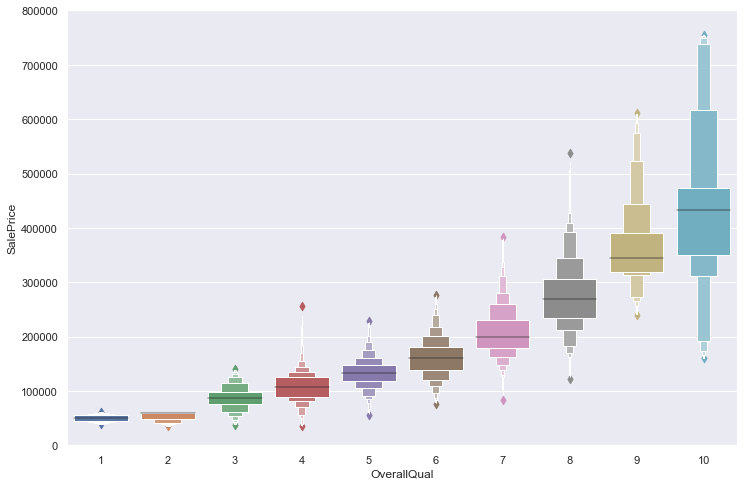

In [252]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sns.boxenplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

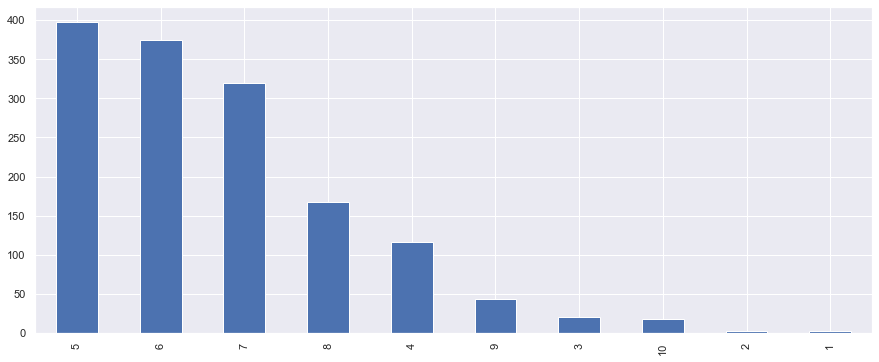

In [253]:
data_train['OverallQual'].value_counts().plot(kind='bar')

In [254]:
df_train_copy = data_train.copy()

In [255]:
for c in cat_feat:
    df_train_copy[c] = df_train_copy[c].astype('category')
    if df_train_copy[c].isnull().any():
        df_train_copy[c] = df_train_copy[c].cat.add_categories(['MISSING'])
        df_train_copy[c] = df_train_copy[c].fillna('MISSING')

In [256]:
df_train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MnPrv,MISSING,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,MISSING,Reg,Lvl,AllPub,...,0,MISSING,MISSING,MISSING,0,4,2010,WD,Normal,142125


In [257]:
def boxplot(x, y, **kwargs):
    sns.boxenplot(x=x,y=y)
    x = plt.xticks(rotation=90)

In [258]:
f = pd.melt(df_train_copy, id_vars=['SalePrice'], value_vars=cat_feat)

In [259]:
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
62775,175000,SaleCondition,Normal
62776,210000,SaleCondition,Normal
62777,266500,SaleCondition,Normal
62778,142125,SaleCondition,Normal


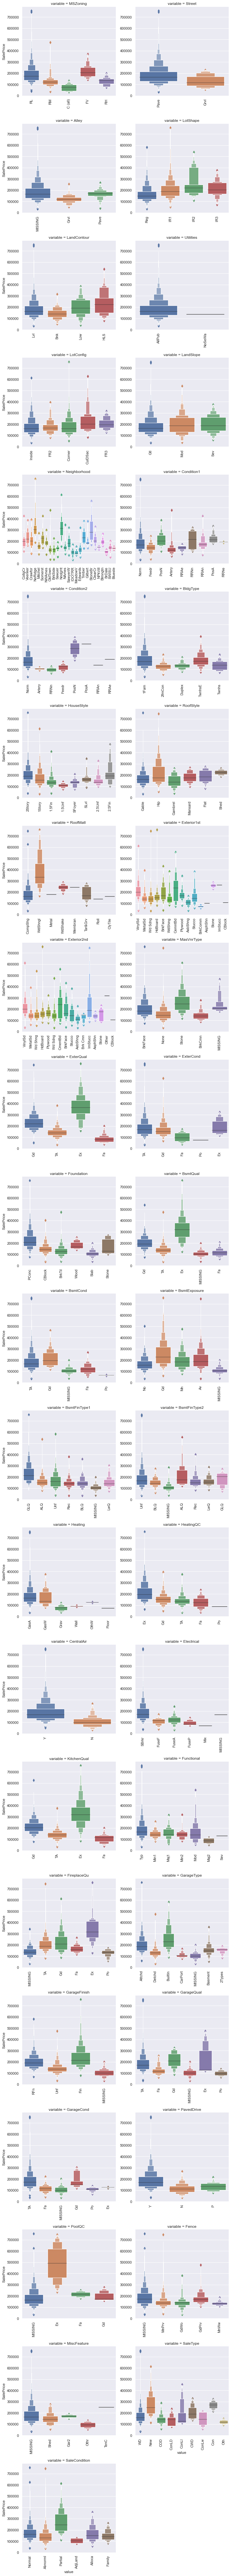

In [260]:
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot,"value",'SalePrice')

In [261]:
data = pd.concat([data_train['SalePrice'],data_train['Neighborhood']],axis=1)

In [262]:
data

,SalePrice,Neighborhood
0,208500,CollgCr
1,181500,Veenker
2,223500,CollgCr
3,140000,Crawfor
4,250000,NoRidge
...,...,...
1455,175000,Gilbert
1456,210000,NWAmes
1457,266500,Crawfor
1458,142125,NAmes


(-0.5, 24.5, 0.0, 800000.0)

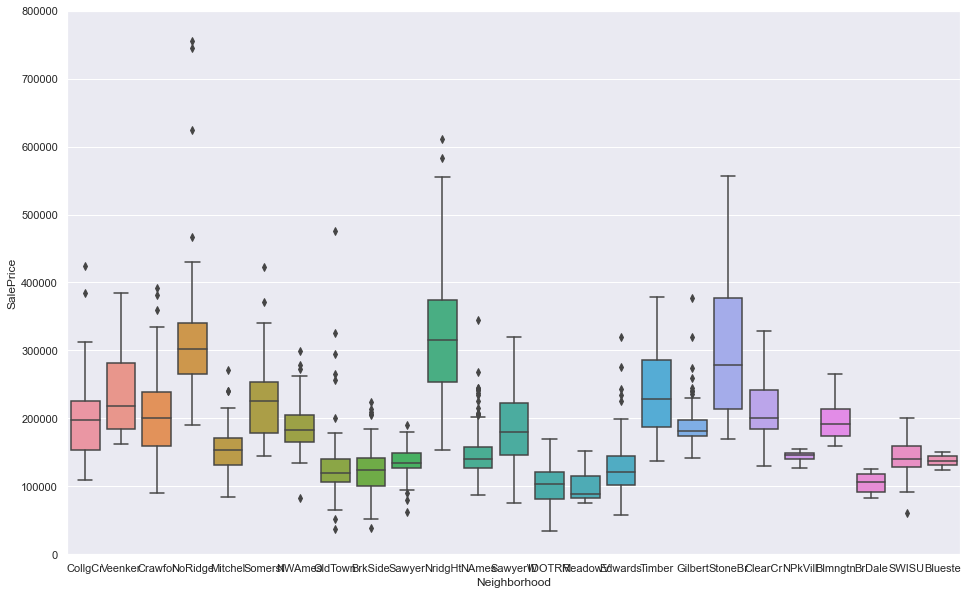

In [263]:
fig, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='Neighborhood',y='SalePrice',data=data )
fig.axis(ymin=0, ymax=800000)

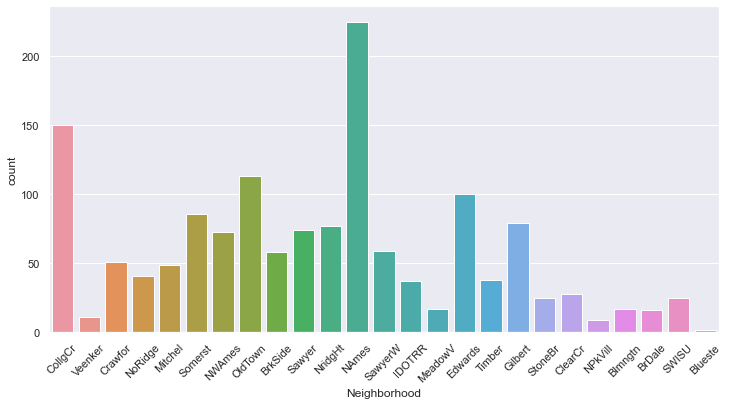

In [264]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Neighborhood', data=data)
plt.xticks(rotation=45)
plt.show()

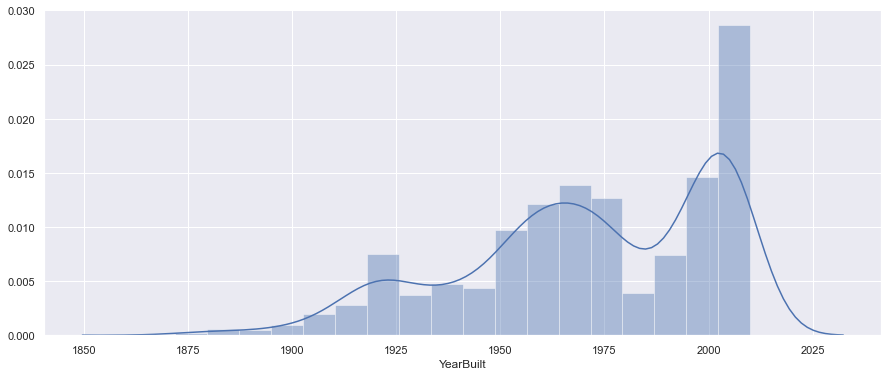

In [265]:
sns.distplot(data_train['YearBuilt'], kde=True)
plt.show()

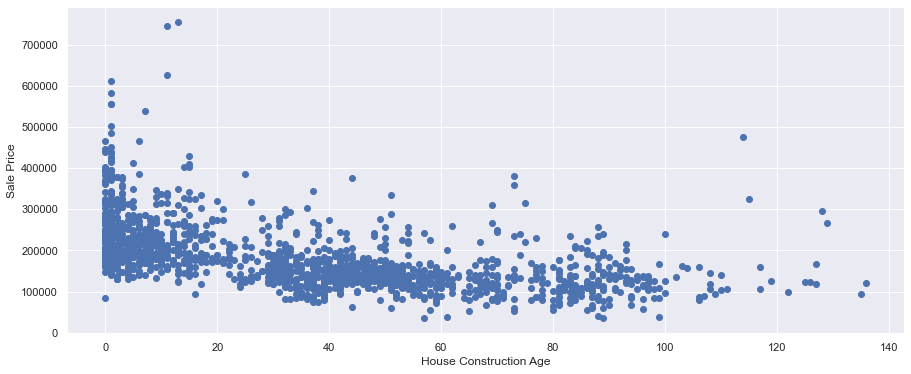

In [266]:
constage = data_train['YrSold'] - data_train['YearBuilt']
plt.scatter(constage, data_train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('House Construction Age')
plt.show()

In [267]:
data_train.drop(columns=['Id','SaleCondition','SaleType','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual','MasVnrType','Exterior2nd','Exterior1st','RoofMatl','RoofStyle','HouseStyle','BldgType','Condition2','Condition1','Neighborhood','LandSlope','LotConfig','Utilities','LandContour','LotShape','Alley','Street','MSZoning'],inplace=True)

In [268]:
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [269]:
data_train.shape

(1460, 37)

In [270]:
data_test.drop(columns=['Id','SaleCondition','SaleType','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual','MasVnrType','Exterior2nd','Exterior1st','RoofMatl','RoofStyle','HouseStyle','BldgType','Condition2','Condition1','Neighborhood','LandSlope','LotConfig','Utilities','LandContour','LotShape','Alley','Street','MSZoning'],inplace=True)

In [271]:
data_test.shape

(1459, 36)

In [272]:
data_train['LotFrontage'].fillna(data_train['LotFrontage'].mean(), inplace=True)
data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mean(), inplace=True)
data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].mean(), inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [273]:
data_test['LotFrontage'].fillna(data_train['LotFrontage'].mean(), inplace=True)
data_test['MasVnrArea'].fillna(data_train['MasVnrArea'].mean(), inplace=True)
data_test['BsmtFinSF1'].fillna(data_train['BsmtFinSF1'].mean(), inplace=True)
data_test['BsmtFinSF2'].fillna(data_train['BsmtFinSF2'].mean(), inplace=True)
data_test['BsmtUnfSF'].fillna(data_train['BsmtUnfSF'].mean(), inplace=True)
data_test['TotalBsmtSF'].fillna(data_train['TotalBsmtSF'].mean(), inplace=True)
data_test['BsmtFullBath'].fillna(data_train['BsmtFullBath'].mean(), inplace=True)
data_test['BsmtHalfBath'].fillna(data_train['BsmtHalfBath'].mean(), inplace=True)
data_test['GarageYrBlt'].fillna(data_train['GarageYrBlt'].mean(), inplace=True)
data_test['GarageCars'].fillna(data_train['GarageCars'].mean(), inplace=True)
data_test['GarageArea'].fillna(data_train['GarageArea'].mean(), inplace=True)

In [274]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [275]:
X = data_train.drop(columns=['SalePrice'])
y = data_train[['SalePrice']]

In [345]:
model_nn = keras.Sequential([keras.layers.Dense(36, activation=tf.nn.relu,input_shape=[36]),
                            keras.layers.Dense(36, activation=tf.nn.relu),
                            keras.layers.Dense(36, activation=tf.nn.relu),
                                    keras.layers.Dense(1)
                                   ])

In [346]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [347]:
model_nn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error','mean_squared_error','accuracy'])

In [348]:
model_nn.fit(X,y, epochs=10)

Epoch 1/10
1460/1460 [==============================] - 0s 111us/step - loss: 34999838209.4027 - mean_absolute_error: 170048.8594 - mean_squared_error: 34999836672.0000 - accuracy: 0.0000e+00
Epoch 2/10
1460/1460 [==============================] - 0s 69us/step - loss: 21227173430.7068 - mean_absolute_error: 123716.3359 - mean_squared_error: 21227175936.0000 - accuracy: 0.0000e+00
Epoch 3/10
1460/1460 [==============================] - 0s 71us/step - loss: 10173750984.5918 - mean_absolute_error: 62829.4570 - mean_squared_error: 10173752320.0000 - accuracy: 0.0000e+00
Epoch 4/10
1460/1460 [==============================] - 0s 68us/step - loss: 8117865005.9397 - mean_absolute_error: 49405.5273 - mean_squared_error: 8117864960.0000 - accuracy: 0.0000e+00
Epoch 5/10
1460/1460 [==============================] - 0s 68us/step - loss: 7020702844.1425 - mean_absolute_error: 47853.7695 - mean_squared_error: 7020702720.0000 - accuracy: 0.0000e+00
Epoch 6/10
1460/1460 [=============================

In [349]:
model_nn.metrics_names

['loss', 'mean_absolute_error', 'mean_squared_error', 'accuracy']

In [350]:
result = model_nn.evaluate(X,y, batch_size=128)

1460/1460 [==============================] - 0s 25us/step


In [351]:
print(model_nn.metrics_names)

['loss', 'mean_absolute_error', 'mean_squared_error', 'accuracy']


In [352]:
print(result)

[3970726442.7835617, 41184.78515625, 3970726144.0, 0.0]


In [353]:
X_train = data_train.drop(columns=['SalePrice'])

In [354]:
X_train.shape

(1460, 36)

In [373]:
y_train = data_train[['SalePrice']]

In [378]:
y_train.shape

(1460, 1)

In [375]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [381]:
num_feat = X_train.select_dtypes(include='number').columns.to_list()
cat_feat = X_train.select_dtypes(exclude='number').columns.to_list()


num_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

ct=ColumnTransformer(remainder='drop',
                    transformers=[
                        ('numeric', num_pipe, num_feat),
                        ('categorical', cat_pipe, cat_feat)
                    ])

model_ranf = Pipeline([('transformer', ct), ('predictor',RandomForestRegressor())])

In [384]:
model_ranf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                             

In [385]:
print(model_ranf.score(X_train,y_train))

0.9807668052129527


In [389]:
pred = model_ranf.predict(data_test)

In [395]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [398]:
#confusion_matrix(y_train,pred)

In [399]:
#accuracy_score(y_train, pred)